In [5]:
import pickle
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

filenames= pickle.load(open('data/labels-caltech101.pickle', 'rb'))
feature_list= pickle.load(open('data/features-caltech101.pickle', 'rb'))

In [6]:
neighbors = NearestNeighbors(n_neighbors=5,metric='euclidean', algorithm='brute').fit(feature_list)

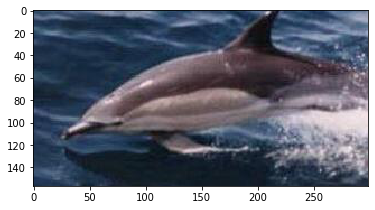

In [7]:
plt.imshow(mpimg.imread(filenames[45]))

In [8]:
distances, indices = neighbors.kneighbors([feature_list[45]])
for i in range(5):
    print(distances[0][i])

0.0
0.43855393
0.48890823
0.5014143
0.52700764


In [11]:
print(indices)
print(indices[0][1])
print(filenames[indices[0][1]])


[[45 67 42 56 38]]
67
caltech101/dolphin/image_0065.jpg


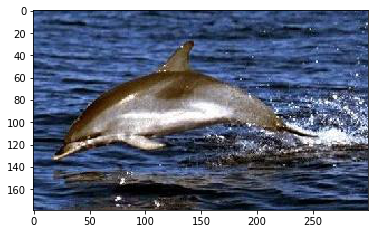

In [12]:

plt.imshow(mpimg.imread(filenames[indices[0][4]]))

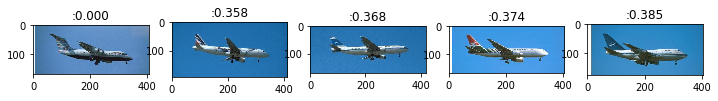

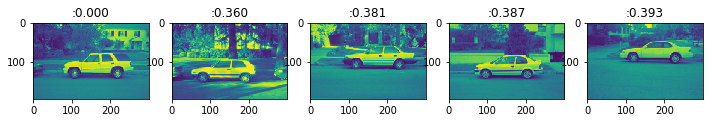

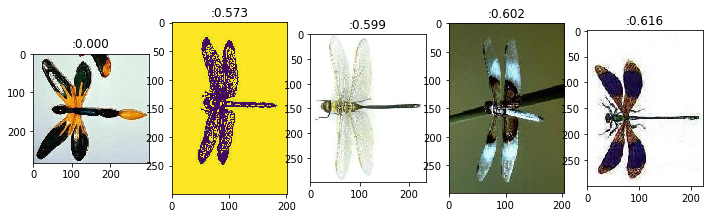

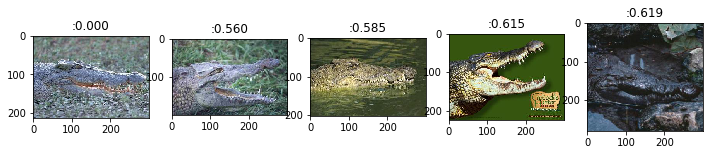

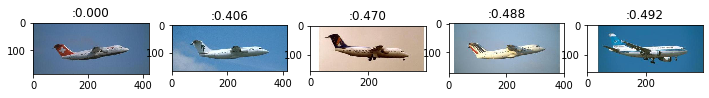

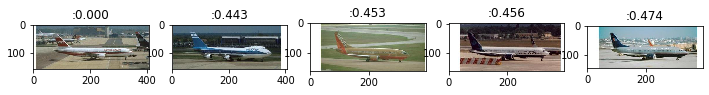

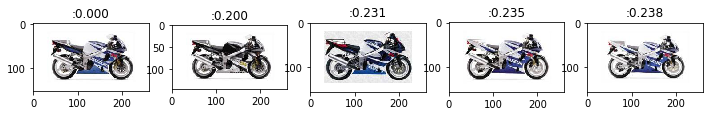

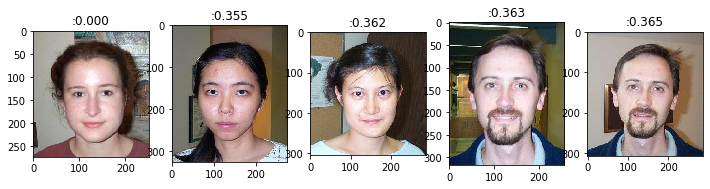

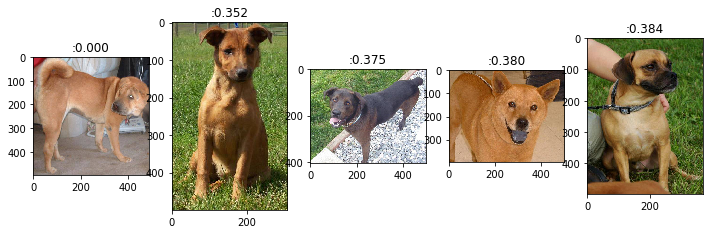

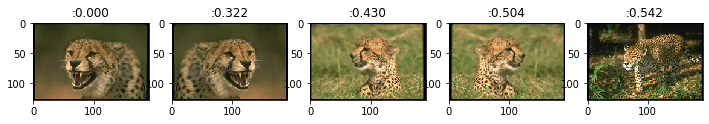

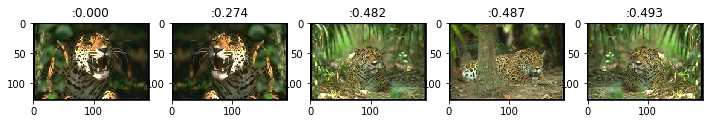

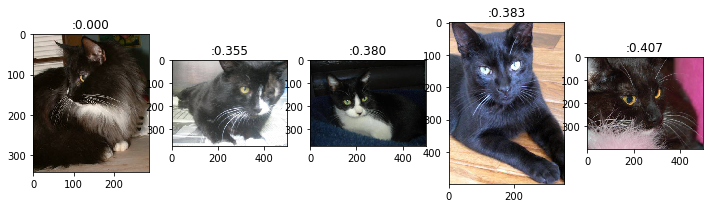

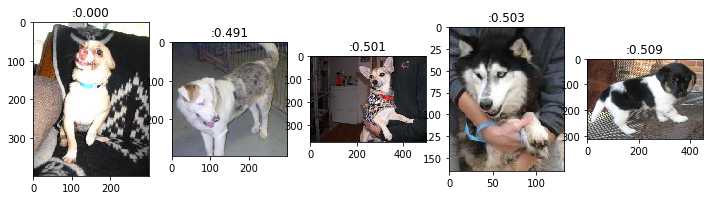

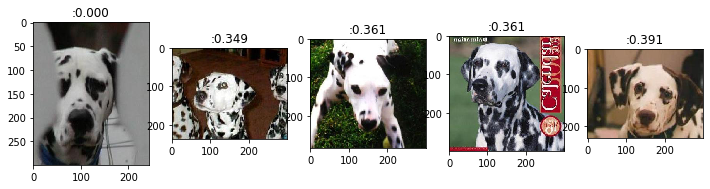

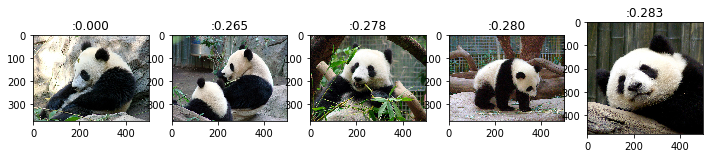

In [47]:
import numpy as np
plt.rcParams['figure.figsize'] = (12,12)
for i in range(15):
    plt.figure()
    random_image_index =np.random.randint(0,8000)
    distances, indices =neighbors.kneighbors([feature_list[random_image_index]])
    similar_image_paths = [filenames[indices[0][i]] for i in range(5)]
    
    distances = distances[0]
    plot_images(similar_image_paths, distances)
    

In [46]:
def plot_images(paths, distances):
    for i in range(len(paths)):
        plt.subplot(2,5,i+1)
        plt.imshow(mpimg.imread(paths[i]))
        plt.title(':{:.3f}'.format(distances[i]))

In [48]:
from keras.applications.mobilenet import preprocess_input
import numpy as np
from numpy.linalg import norm
from keras.preprocessing import image
from keras.models import load_model
model = load_model('deep_pca_model_improved.hdf5')
def feature_extraction(model, path):
    img =image.load_img(path,target_size=(224,224,3))
    img_array =image.img_to_array(img)
    expanded_img =np.expand_dims(img_array, axis=0)
    prepocesed_img = preprocess_input(expanded_img)
    features = model.predict(prepocesed_img)
    features = features.flatten()
    return features/norm(features)

Using TensorFlow backend.
/home/ojay/anaconda3/lib/python3.7/site-packages/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [49]:
path ='caltech101/ant/image_0001.jpg'

image_feature=feature_extraction(model,path )
distances, indices = neighbors.kneighbors([image_feature])

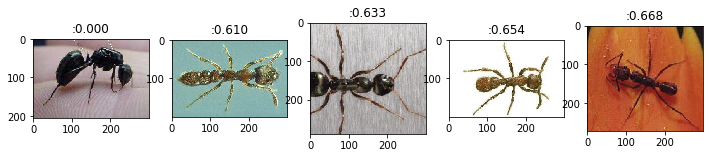

In [50]:
similar_image_paths = [filenames[indices[0][i]] for i in range(5)]
plot_images(similar_image_paths, distances[0])

In [61]:
def sim(a,b):
    return a.dot(b)/np.sqrt(a.dot(a)*b.dot(b))
b = feature_list[indices[0][0]]
print(b.dtype)
sim(image_feature,b)


float32


1.0

In [ ]:
selected_features = feature_list_compressed[:4000]
selected_filenames = filenames[:4000]
tsne_results = TSNE(n_components=2,verbose=1,metric='euclidean').fit_transform(selected_features)

In [ ]:
colormap = plt.cm.get_cmap('coolwarm')
scatter_plot = plt.scatter(tsne_results[:,0],tsne_results[:,1], cmap=colormap,c='r')
plt.colorbar(scatter_plot)
plt.show()

In [ ]:
import matplotlib
pca = PCA(200)
pca.fit(feature_list)
matplotlib.style.use('seaborn')
plt.plot(range(1,201),pca.explained_variance_ratio_,'o--',
markersize=4)
plt.title ('Variance for each PCA dimension')
plt.xlabel('PCA Dimensions')
plt.ylabel('Variance')
plt.grid(True)
plt.show()

In [ ]:
pca = PCA(1000)
pca.fit(feature_list)
matplotlib.style.use('seaborn')
plt.plot(range(1,1001),pca.explained_variance_ratio_,'o--',
markersize=4)
plt.title ('Variance for each PCA dimension')
plt.xlabel('PCA Dimensions')
plt.ylabel('Variance')
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
num_items = 1000000
num_dimensions = 100
dataset = np.random.randn(num_items, num_dimensions)
dataset /= np.linalg.norm(dataset, axis=1).reshape(-1, 1)
random_index = np.random.randint(0,num_items)
query = dataset[random_index]

In [ ]:
neighbors = NearestNeighbors(n_neighbors=5, algorithm='brute',
metric='euclidean').fit(dataset)
%timeit distances, indices = neighbors.kneighbors([query])

In [ ]:
from annoy import AnnoyIndex
annoy_index = AnnoyIndex(num_dimensions) # Length of item vector that
for i in range(num_items):
    annoy_index.add_item(i, dataset[i])
annoy_index.build(40)


In [ ]:
%timeit indexes=annoy_index.get_nns_by_vector(query, 5, include_distances=True)


In [ ]:
from keras.applications.resnet50 import (ResNet50, preprocess_input)
from keras.layers import (Input,Dense,GlobalAveragePooling2D)

In [ ]:
model = ResNet50(weights='imagenet', input_shape=(224,224,3))
input = Input(shape =(224,224,3))
x = model(input)
x = GlobalAveragePooling2D()(x)
x = Dense(Num_classes, activation='softmax')(x)


In [ ]:
from tf_explain.core.grad_cam import GradCAM
import os
from keras.applications.mobilenet import MobileNet
from  keras.preprocessing import image
model = MobileNet(weights='imagenet', include_top=True)
# Set Grad CAM System
explainer = GradCAM()# Image Processing
IMAGE_PATH = 'dogs_00051.jpg'
dog_index = 263
img =image.load_img(IMAGE_PATH, target_size=
(224, 224))
img = image.img_to_array(img)
data = ([img], None)
# Passing the image through Grad CAM
grid = explainer.explain(data, 'Conv1D', model,263)
name = IMAGE_PATH.split(".jpg")[0]
os.makedir('tmp')
explainer.save(grid, 'tmp/', name + '_grad_cam.png')

In [ ]:
from PIL import Image
from autoaugment import ImageNetPolicy
img = Image.open("cat.jpg")
policy = ImageNetPolicy()
imgs = [policy(img) for _ in range(8)]
for  img in imgs
plt.imshow(img)